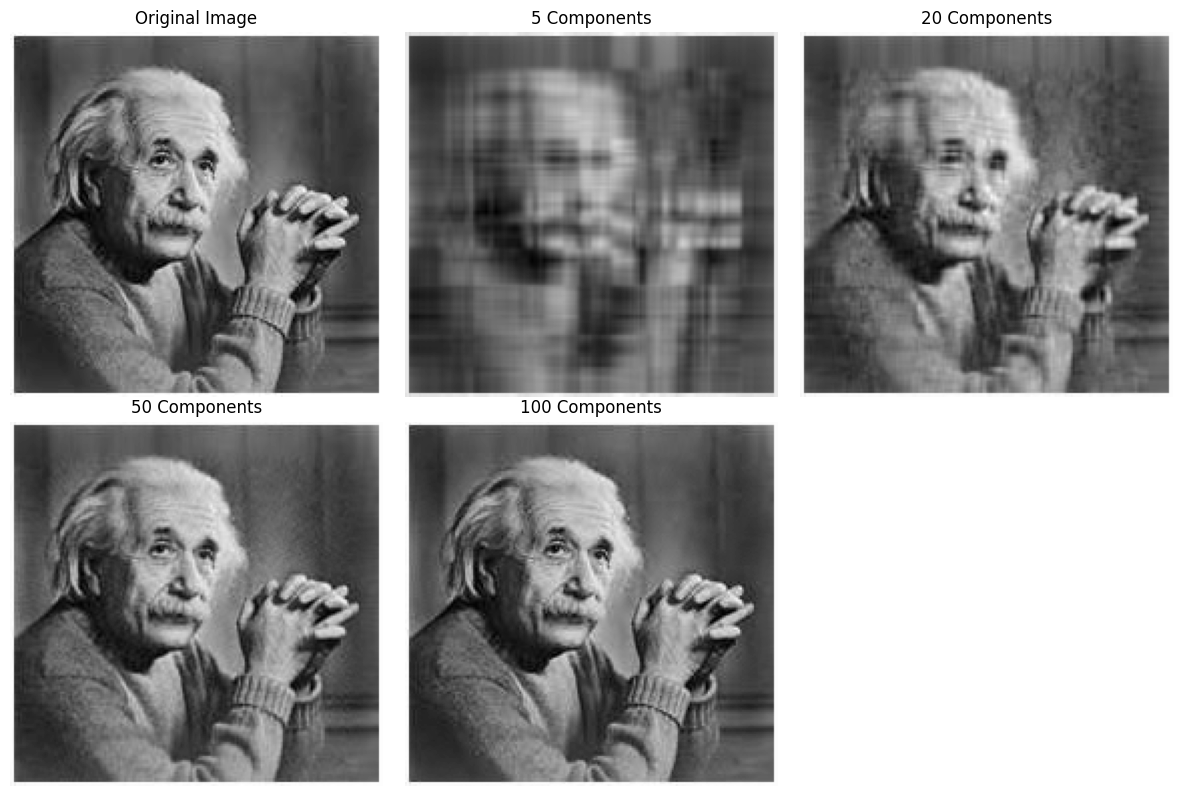

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image

# Step 1: Load the image and convert it to grayscale
image_path = '/content/einstein.jpg'
img = Image.open(image_path).convert('L')  # Convert to grayscale
img_np = np.array(img)

# Step 2: Reshape the image into a 2D matrix (pixels as rows, features as columns)
img_flattened = img_np / 255.0  # Normalize pixel values to [0, 1]

# Step 3: Apply PCA to reduce dimensionality
pca = PCA(n_components=100)  # We'll reduce to 100 components as an example
img_pca = pca.fit_transform(img_flattened)

# Step 4: Reconstruct the image using different numbers of principal components
def reconstruct_image(pca, components):
    pca.n_components = components
    img_reduced = pca.fit_transform(img_flattened)
    img_reconstructed = pca.inverse_transform(img_reduced)
    return img_reconstructed

components_list = [5, 20, 50, 100]  # Different number of components to use for reconstruction

# Step 5: Visualize the original and reconstructed images
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(img_np, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Reconstructed images
for i, components in enumerate(components_list):
    img_reconstructed = reconstruct_image(pca, components)
    plt.subplot(2, 3, i + 2)
    plt.imshow(img_reconstructed, cmap='gray')
    plt.title(f'{components} Components')
    plt.axis('off')

plt.tight_layout()
plt.show()
